In [16]:
# Importing relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
population_df = pd.read_csv('PEA01.20231009T211038.csv')

In [18]:
#using the pandas read_csv function we will get a DataFrame object. A DataFrame is a two-dimensional, size-mutable,
# population_df = pd.read_csv(path)

In [19]:
#checking the first 5 rows of the data so that we can get idea of the dataset
population_df.head(10)

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V02508,Age Group,C02199V02655,Sex,UNIT,VALUE
0,PEA01,Population Estimates (Persons in April),1950,1950,205,0 - 4 years,-,Both sexes,Thousand,293.8
1,PEA01,Population Estimates (Persons in April),1950,1950,205,0 - 4 years,1,Male,Thousand,149.2
2,PEA01,Population Estimates (Persons in April),1950,1950,205,0 - 4 years,2,Female,Thousand,144.6
3,PEA01,Population Estimates (Persons in April),1950,1950,245,5 - 9 years,-,Both sexes,Thousand,278.9
4,PEA01,Population Estimates (Persons in April),1950,1950,245,5 - 9 years,1,Male,Thousand,142.3
5,PEA01,Population Estimates (Persons in April),1950,1950,245,5 - 9 years,2,Female,Thousand,136.6
6,PEA01,Population Estimates (Persons in April),1950,1950,265,10 - 14 years,-,Both sexes,Thousand,262.1
7,PEA01,Population Estimates (Persons in April),1950,1950,265,10 - 14 years,1,Male,Thousand,133.4
8,PEA01,Population Estimates (Persons in April),1950,1950,265,10 - 14 years,2,Female,Thousand,128.7
9,PEA01,Population Estimates (Persons in April),1950,1950,300,15 - 19 years,-,Both sexes,Thousand,244.0


In [20]:
#using the info() function so that we can check and understand the structure of the DataFrame and gain insights into the data it contains.
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        3996 non-null   object 
 1   STATISTIC Label  3996 non-null   object 
 2   TLIST(A1)        3996 non-null   int64  
 3   Year             3996 non-null   int64  
 4   C02076V02508     3996 non-null   int64  
 5   Age Group        3996 non-null   object 
 6   C02199V02655     3996 non-null   object 
 7   Sex              3996 non-null   object 
 8   UNIT             3996 non-null   object 
 9   VALUE            3885 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 312.3+ KB


In [21]:
#we will clean some of the columns as they won't be useful for our analysis

to_drop = ['STATISTIC', 'TLIST(A1)', 'C02076V02508', 'C02199V02655']

population_df.drop(to_drop, inplace=True, axis=1)

# inplace=True is an argument that, when set to True, means that the changes will be made directly to the population_df
# inplace=false is the default, it would return a new DataFrame with the specified columns removed
# axis=1 specifies that we want to drop columns. 
# axis parameter indicates whether we are dropping rows (axis=0) or columns (axis=1)

In [22]:
population_df.head()

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,293.8
1,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,149.2
2,Population Estimates (Persons in April),1950,0 - 4 years,Female,Thousand,144.6
3,Population Estimates (Persons in April),1950,5 - 9 years,Both sexes,Thousand,278.9
4,Population Estimates (Persons in April),1950,5 - 9 years,Male,Thousand,142.3


In [23]:
#checking all unique values we have for the Year column (integer)
population_df['Year'].unique()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [24]:
#we will be looking at the data only for the past 23 years, so we would need to filter out the data so we create a new DataFrame which will have data from 2013 onwards
population_last_10_years_df = population_df[(population_df['Year'] >2012)]

In [25]:
#confirming that we've filtered out the data
population_last_10_years_df.head()

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
3402,Population Estimates (Persons in April),2013,0 - 4 years,Both sexes,Thousand,353.0
3403,Population Estimates (Persons in April),2013,0 - 4 years,Male,Thousand,180.0
3404,Population Estimates (Persons in April),2013,0 - 4 years,Female,Thousand,173.1
3405,Population Estimates (Persons in April),2013,5 - 9 years,Both sexes,Thousand,333.0
3406,Population Estimates (Persons in April),2013,5 - 9 years,Male,Thousand,170.7


In [26]:
#checking all unique appearances in the Sex column
population_last_10_years_df['Sex'].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [27]:
sex_totals = population_last_10_years_df.groupby('Sex')['VALUE'].sum().reset_index()

print(sex_totals)

          Sex    VALUE
0  Both sexes  53912.1
1      Female  27231.9
2        Male  26679.6


In [28]:
pivot_table = population_last_10_years_df.pivot_table(index=['Year', 'Sex'], values='VALUE', aggfunc='sum')

# Reset index to make 'Year' and 'Sex' regular columns
pivot_table.reset_index(inplace=True)

print(pivot_table)

    Year         Sex   VALUE
0   2013  Both sexes  4614.6
1   2013      Female  2328.6
2   2013        Male  2286.0
3   2014  Both sexes  4645.6
4   2014      Female  2346.3
5   2014        Male  2298.9
6   2015  Both sexes  4687.8
7   2015      Female  2370.1
8   2015        Male  2317.8
9   2016  Both sexes  4739.8
10  2016      Female  2393.1
11  2016        Male  2346.7
12  2017  Both sexes  4810.9
13  2017      Female  2430.0
14  2017        Male  2380.7
15  2018  Both sexes  4884.9
16  2018      Female  2465.4
17  2018        Male  2419.6
18  2019  Both sexes  4958.5
19  2019      Female  2502.0
20  2019        Male  2456.3
21  2020  Both sexes  5029.8
22  2020      Female  2538.3
23  2020        Male  2491.8
24  2021  Both sexes  5074.7
25  2021      Female  2560.8
26  2021        Male  2514.1
27  2022  Both sexes  5183.9
28  2022      Female  2621.9
29  2022        Male  2561.8
30  2023  Both sexes  5281.6
31  2023      Female  2675.4
32  2023        Male  2605.9


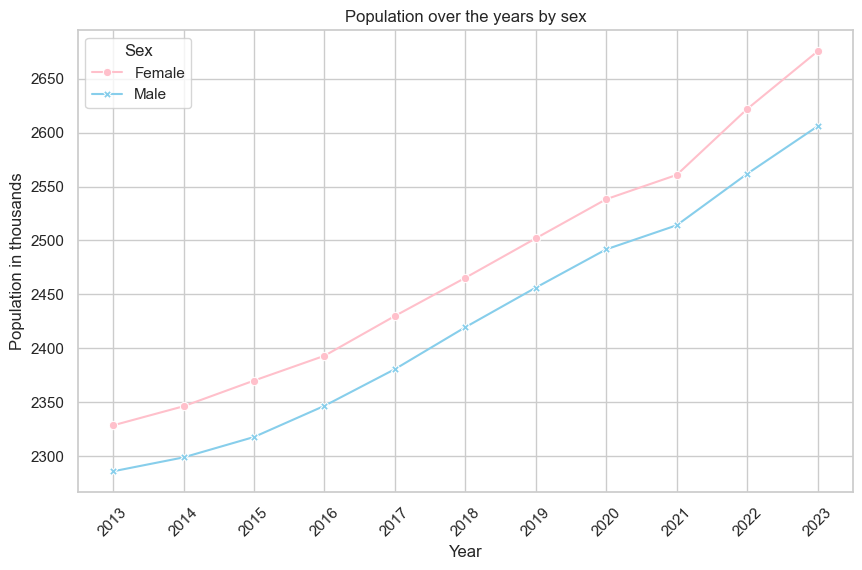

In [29]:
filtered_pivot_table = population_last_10_years_df[population_last_10_years_df['Sex'] != 'Both sexes']

pivot_table = filtered_pivot_table.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')

# Step 4: Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid')  # Set the style of the plot

custom_palette = {'Male': '#87CEEB', 'Female': '#FFC0CB'}

# Create the line plot
sns.lineplot(data=pivot_table,palette = custom_palette, markers = True, dashes=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Population in thousands')
plt.title('Population over the years by sex')

tick_positions = range(int(pivot_table.index.min()), int(pivot_table.index.max()) + 1)
plt.xticks(tick_positions, tick_positions, rotation=45)

# Show the plot
plt.legend(title='Sex')
plt.show()

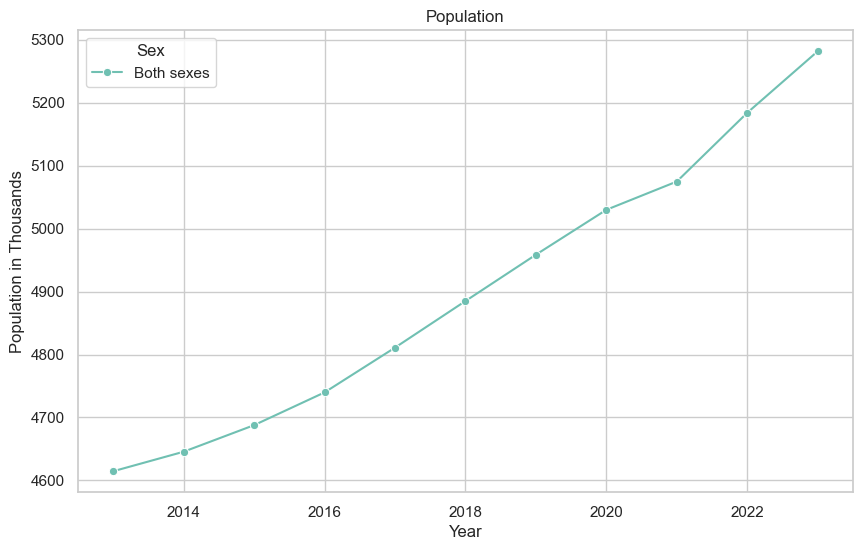

In [30]:
filtered_pivot_table = population_last_10_years_df[population_last_10_years_df['Sex'] == 'Both sexes']

pivot_table = filtered_pivot_table.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')

# Step 4: Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid')  # Set the style of the plot

custom_palette = {'Both sexes': '#70c0b2'}

# Create the line plot
sns.lineplot(data=pivot_table, palette = custom_palette , markers = True, dashes=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Population in Thousands')
plt.title('Population')

# Show the plot
plt.legend(title='Sex')
plt.show()